In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\mahid\anaconda3\lib\site-packages (1.7.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge ipywidgets

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: pandas-profiling[notebook] in c:\users\mahid\anaconda3\lib\site-packages (3.0.0)


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [6]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [7]:
# importing library

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

%matplotlib inline

I am going to use vehicle dataset which i got it from kaggle website.
Website reference: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv.
This dataset is containing information about used cars which is listed on one website. This dataset stored in csv file on website. So, we do not need perform any operation to get dataset. I just downloaded from kaggle website. Using pandas, we can read that csv file and analysis.In this dataset, we have informations of cars such as name of the car, bought year of the car,selling price, number of km car is driven, seller type, car is sold by individual or dealer, gear transmission of car, number of previous owner, mileage and capacity of engine in car. On the website, we have three different csv file but I am using only one csv file. In other two files, we have almost same type of information and very small dataset. So i am thinking to use the dataset which have more infromation and details.  
From this dataset, we can say if any buyer wants to buy car, it is difficult to decide which car is best on price based of km driven, how old car is, fuel or engine type etc. Buyers will not able to answers from data that which type of cars frequently buyer would preffering. I would like to do solve the problems such as km, selling price, future prediction of selling price, what type of fuel most people preferring etc.
I chose car realted dataset bacause my husband has intrest in cars. He is more up to date about cars and their specifications. He always discuss with me regarding cars like newest car price, or if we bought car from third party what features require to check.     

In [8]:
# reading the car details v3.csv file

Car_detail = pd.read_csv('Car details v3.csv')
Car_detail

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Generate the Profiling Report
profile = ProfileReport(Car_detail, title="Car detail dataset", html={"style": {"full_width": True}}, sort=None)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report is just one line code but it will save our time and give analysis of our data. The pandas profiling report will help us to visualizing and understanding the distribution of each variable. It is generate report with all the information. with the profiling report, we can get information of any missing data in dataset. 

In [11]:
Car_detail = Car_detail.drop_duplicates()
Car_detail

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Removing duplicate rows from the dataset by using drop duplicate function.

In [12]:
Car_detail.describe()  # using describe function to calculate statistical data information

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


from above chart, we are able to recognize the mean value, count, max, min, percentile values for numeric columns from dataset.

In [13]:
Car_detail.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

If we would like to see which types data we have it in our dataset than we can see by using dtypes function.

Text(0.5, 1.0, 'Selling price based on owner')

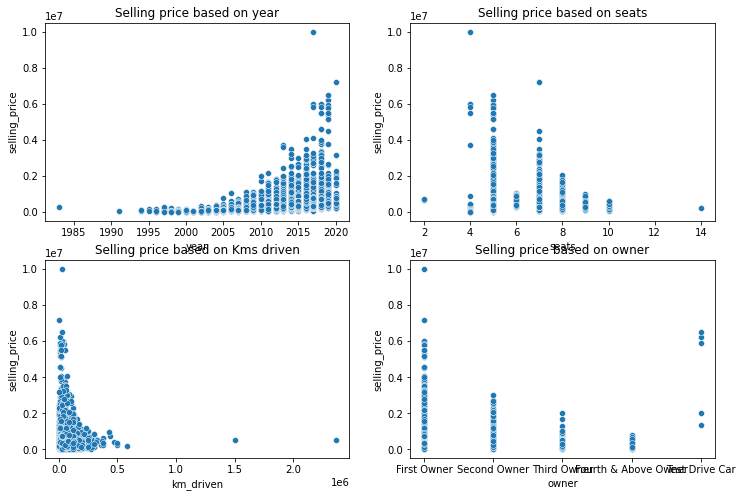

In [37]:
# Creating the scatter plot with seaborn:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12,8) )
sns.scatterplot(x='year', y='selling_price', data = Car_detail, ax = axes[0][0])
sns.scatterplot(x='seats', y='selling_price', data = Car_detail, ax = axes[0][1])
sns.scatterplot(x='km_driven', y='selling_price', data = Car_detail, ax = axes[1][0])
sns.scatterplot(x='owner', y='selling_price', data = Car_detail, ax = axes[1][1])
axes[0, 0].set_title('Selling price based on year')
axes[0, 1].set_title('Selling price based on seats')
axes[1, 0].set_title('Selling price based on Kms driven')
axes[1, 1].set_title('Selling price based on owner')

From above plot, we are getting information of seeling price for car based on car bought year. we can clear say from plot that maximum car price was in 2017 but that maximum price was just for one car. Each passing year, price was going up. if people want to buy cars than buy it sooner the better, considering the last 37 years market trand. Maximum cars were selling on higher price in year of 2019. In 2020, selling price was stable for every cars. might be the reason for that is covid-19 pandemic.

From the selling price based on car seat graph, we can demostrate that selling price was stably increases for 5 seats car. so we can say most people preferring and buying the car which have 5 seats .

From the selling price based on km driven graph, we can say that km driven decreases,we are getting higher selling price.

From the selling price based on owner, we can say that 

We can see that out of four variables the two variables that gives a nice correlation which are number 3 graph and number 1 graph, so we will choose number 3 and 1 graph variables to make the prediction model.

I am using linear regression model to predict the selling price. fitting my data into linear regression model and predict the value.

In [15]:
est = smf.ols('selling_price ~ year * km_driven', Car_detail).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     548.0
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          1.41e-319
Time:                        09:40:34   Log-Likelihood:            -1.0024e+05
No. Observations:                6926   AIC:                         2.005e+05
Df Residuals:                    6922   BIC:                         2.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.292e+08    4.3e+06    -30.067      0.000   -1.38e+08   -1.21e+08
year            6.442e+04   2133.567     30.194      0.000    6.02e+04    6.86e+04
km_driven        302.3683     49.447      6.115      0.000     205.437     399.300
year:km_driven    -0.1504      0.025     -6.116      0.000      -0.199      -0.102
==============================================================================
Omnibus:                     8321.199   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1309250.349
Skew:                           6.347   Prob(JB):                         0.00
Kurtosis:                      69.149   Cond. No.                     1.45e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we are fitting selling price and present price from our car data dataset to OLS model, we are getting 19.2% r-square value which means we are getting 19.2% accuracy. Moreover, we are getting p value lower than 0.05 which means our linear regression model is statistical significance. 

<Figure size 576x432 with 0 Axes>

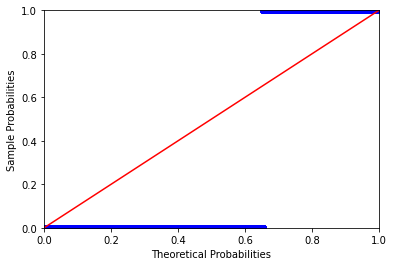

In [18]:
# normal distribution residuals for checking assumption 
probplot=sm.ProbPlot(est.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()


From above, we can say that the residuals are not normally distributed because the blue line and red line are not close enough.

In [19]:
regr = skl_lm.LinearRegression()
selling_price = Car_detail.selling_price
km_driven = Car_detail.km_driven.values.reshape(-1,1)
regr.fit(km_driven,selling_price)
Pred_selling = regr.predict(km_driven)
print('predicted response:', Pred_selling)

predicted response: [411794.87068157 449409.84225618 419907.90376629 ... 464160.81150113
 450884.93918068 449409.84225618]


<AxesSubplot:ylabel='Count'>

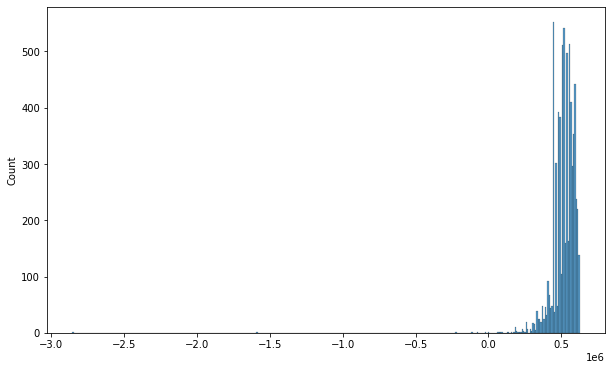

In [20]:
# distribution plot between predicted value and actual value
fig = plt.figure(figsize=(10, 6))
sns.histplot(Pred_selling)

In [21]:
r2 = r2_score(selling_price, Pred_selling)
r2

0.02743000893143721

I was able to predict selling price based on kms driven and year for car deatil dataset.But with this prediction, we are just getting 2.7% accuracy.

When people are thinking to buy a cars, they have some specific crtieria in their mind like they might looking for diesel car or specific killometer driven or specific mileage or few olds etc. Based on below graph, we can narrow down the people's search. It will save time for buyers. They can use their specific crtieria to find their best preferrable car. 

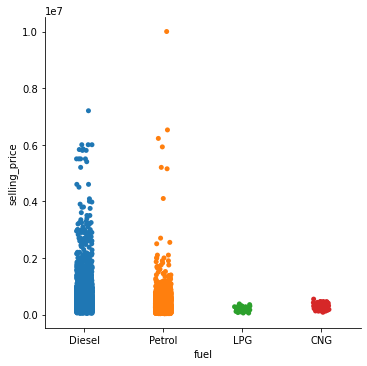

In [22]:
sns.catplot(data = Car_detail, x="fuel", y="selling_price")

From fuel vs selling price graph, we can say that the one person who weer using petrol car, he got higher selling price but diesel cars are selling more compare to petrol cars. Moreover we can say from the graph that maximum people prefering diesel cars and minimum people prefering LPG fuel cars. We can compare the price of diesel and petrol cars. It also reflects general people's preference about car.

In [23]:
# sns.lineplot(data=Car_detail,x='year',y='selling_price',hue = 'km_driven')

From above graph, we can say that  killometer of car driving increase, selling price will decrease.

<AxesSubplot:xlabel='owner', ylabel='count'>

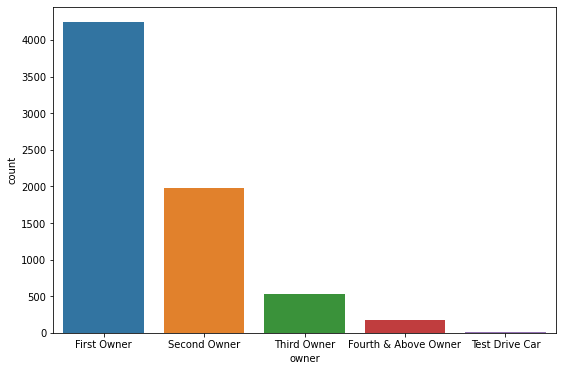

In [24]:
fig = plt.figure(figsize=(9 , 6))
sns.countplot(data=Car_detail, x = 'owner', order = Car_detail.owner.value_counts().index)

Above graph describing that Number of owner decrease, we are getting higher selling price. For example: I have one brand new car. so i am the first owner of the car so if i will sell my car to other person,i will more selling price. But that other person sell my car again, he might get lower selling price because of more killometer driven orr year of car mmanufacture. 

<AxesSubplot:xlabel='year', ylabel='count'>

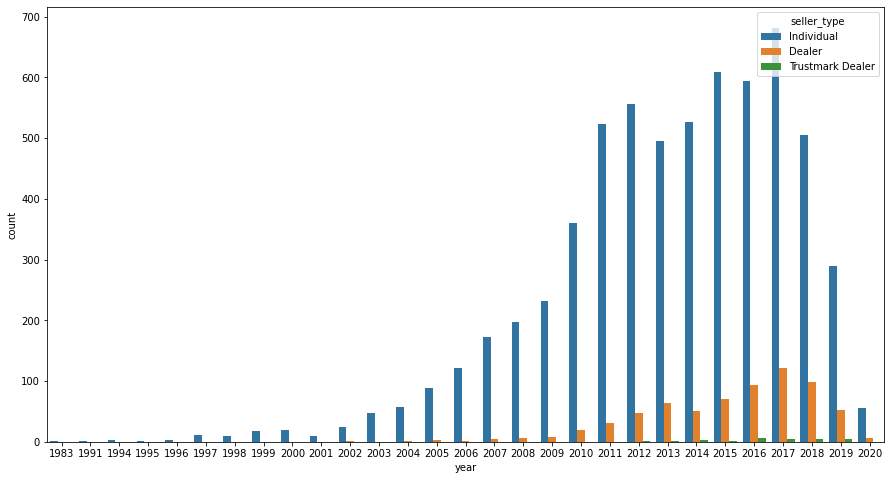

In [25]:
fig = plt.figure(figsize=(15, 8))
sns.countplot( x ="year", hue="seller_type", data= Car_detail)

This demonstrates that numbers of selling foe individual seller type contineously incerases from 2001 to 2012. After 2012, it started fluctautes. In year of 2017, maximum people bought cars individually. Most of people were using very negligible time use  dealer to buy cars after that people are using the dealer but as comapre individual seller type, very less time using dealer. As compare to individual or dealer seller type, people are using very less time trustmark dealer. It also reflects that people prefers to buy cars individual more often than dealer or trustmark dealer. 

In [26]:
Car_detail['present_year'] = 2021

C:\Users\mahid\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
Car_detail['Car_difference'] = 2021 - Car_detail['year']
Car_detail['Car_difference']

C:\Users\mahid\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        7
1        7
2       15
3       11
4       14
        ..
8121     8
8122     7
8123     8
8124    14
8125    12
Name: Car_difference, Length: 6926, dtype: int64

From above, we are getting car difference based on current year 2021 with car bought year. 

In [ ]:
Car_detail['Car_difference'].describe()

In [ ]:
data = Car_detail.loc[Car_detail['Car_difference'] < 5]

sns.catplot(data = data, x = 'km_driven',y = 'selling_price', aspect=4.0,hue = 'Car_difference')

Maximum using cars are like 18 years old  while minimum using cars are like 3 years old. Moreover, we are getting average for using car is 7.37. From the car difference, buyers can get idea about how old car is. sometimes, buyers want to buy maybe some specific year's old car. so car difference will narrow down the buyer's search.

<AxesSubplot:>

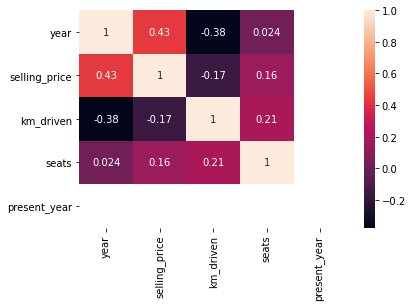

In [27]:
sns.heatmap(Car_detail.corr(),annot=True)

In above graph,we can say that year and km driven has high negative correlation of -0.38. This means if km driven value increases at that time year is decrease and vice versa. This might happen. Depend on use of car, killometer will increses. For exampale, someone have a new car and if that person is using car as uber or he might have to drive more killometer everyday. 
Year and selling price has the highest positive correlation of 0.43

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

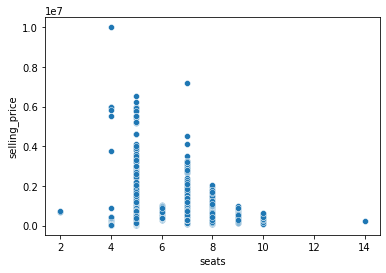

In [29]:
# Creating the scatter plot with seaborn:
sns.scatterplot(x = 'seats', y = 'selling_price', data = Car_detail)

In [ ]:
sns.displot(Car_detail['Car_difference'], kde=False, color='red', bins=50)

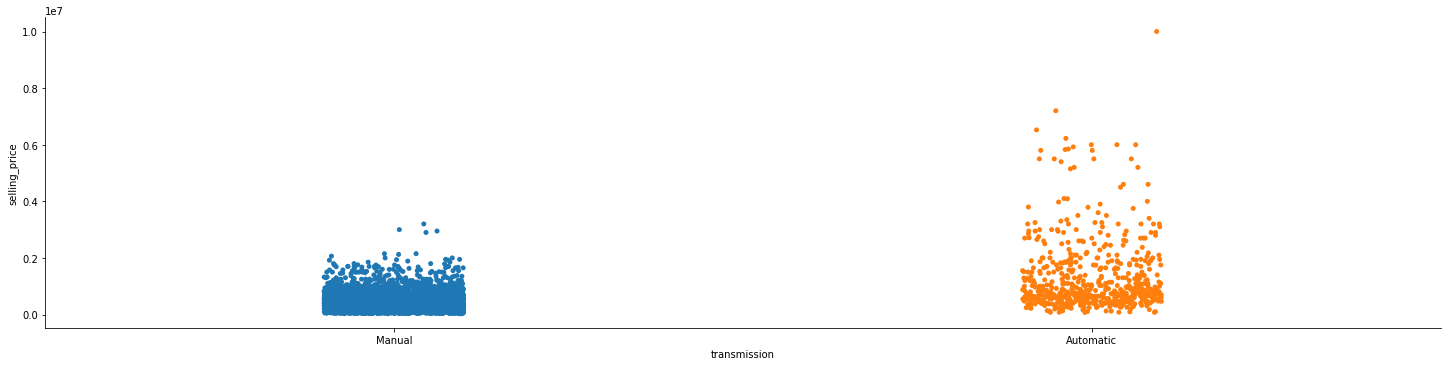

In [44]:
sns.catplot(data = Car_detail, x = 'transmission',y = 'selling_price', aspect=4.0)

Conclusions form the above plots-
It seems that as the km_driven increases, the selling_price decreases, which makes sense
Selling price and mileage are directly proportional, as expected
As the number of owners decrease, the price increases
Automatic Transsmissiom vehicles sell at a higher price
Newer cars also sell at a higher price except the year 2020. (This affect is mostly due to the pandemic) Most patterns are as one would expect.